Para este ejercicio vamos a trabajar con la base de datos [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Se trata de una base de datos de 50.000 muestras de entrenamiento y 10.000 muestras de test. Éstas representan imágenes de la vida cotidiana pertenecientes a 10 clases diferentes. El ejercicio consistirá en, dada una imagen, predecir la clase a la que pertenece. Las clases que podemos encontrar son: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco y camión.

Uno de las principales desventajas con las que hay que lidiar en esta base de datos es el tamaño de las imágenes (32x32), por lo tanto, son imágenes con baja resolución.

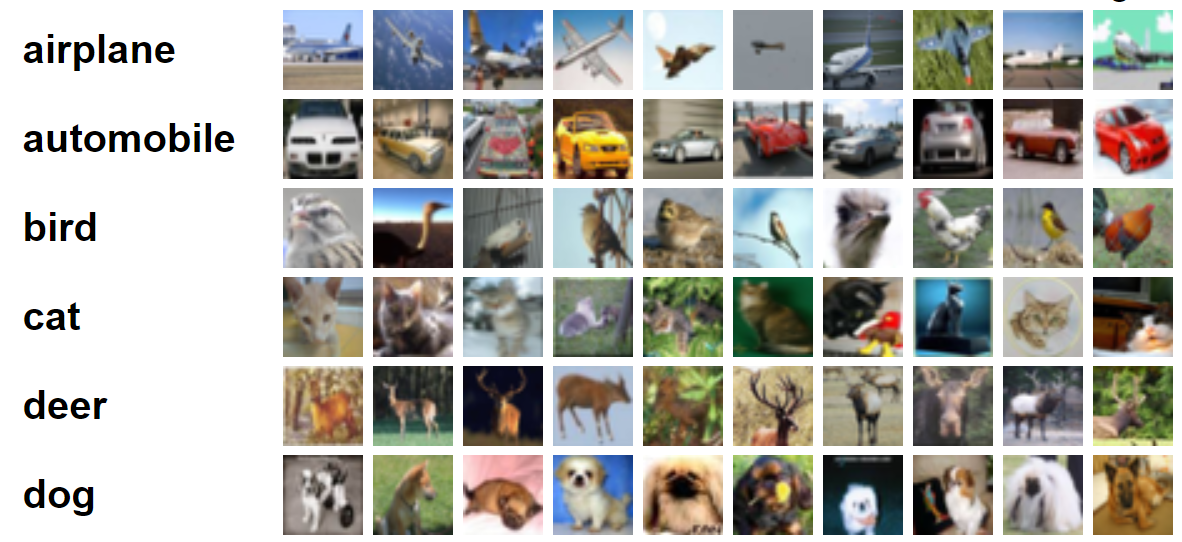

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import time

import gc

In [ ]:
cifar = keras.datasets.cifar10
(X_train_val, y_train_val), (X_test, y_test) = cifar.load_data()

170498071/170498071 [==============================] - 4s 0us/step


<ipython-input-9-a3c4ed05c2db>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'{classes[int(y_train_val[j])]}')


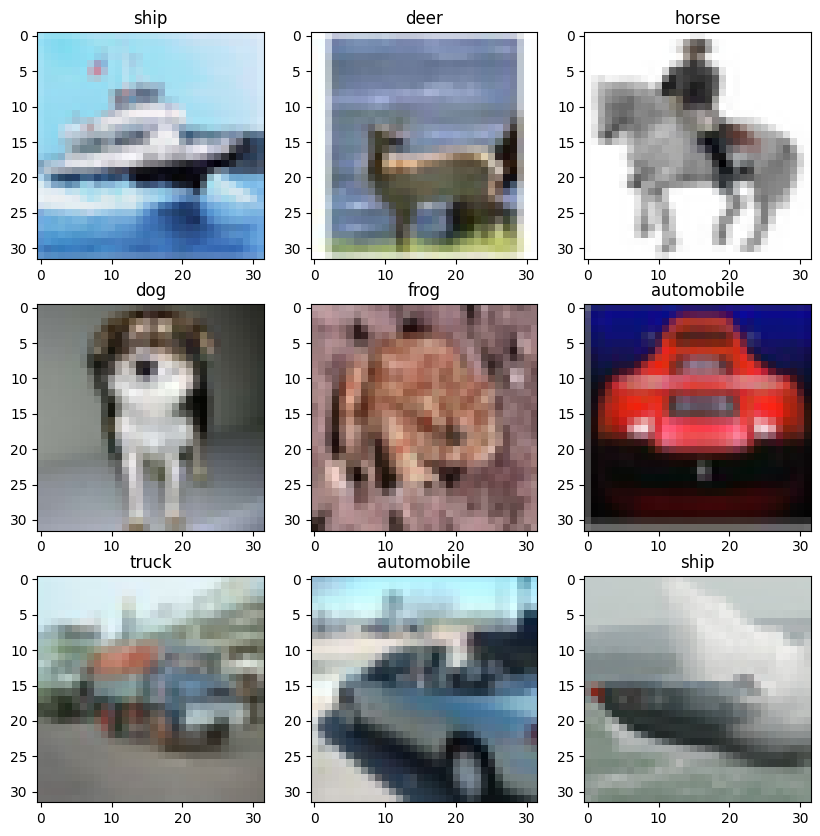

In [ ]:
# Visualizamos las imágenes disponibles en la base de datos

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
           'horse', "ship", "truck"]

# Configuramos tamaño de las imágenes para una correcta visualización
plt.figure(figsize = (10,10))
# Mostramos 9 imágenes aleatorias con su etiqueta correspondiente
for i in range(9):
  plt.subplot(3, 3, i+1)
  j = np.random.randint(0, X_train_val.shape[0])
  plt.imshow(X_train_val[j])
  plt.title(f'{classes[int(y_train_val[j])]}')

Podemos observar la baja calidad de las imágenes. Algunas de ellas apenas se consigue reconocer a simple vista la clase a la que pertenecen.

In [ ]:
# Diferenciamos entre entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

print('Tamaño datos entrenamiento: ', X_train.shape)
print('Tamaño datos validación: ', X_val.shape)
print('Tamaño datos test: ', X_test.shape)

print('Tamaño etiquetas entrenamiento: ', y_train.shape)
print('Tamaño etiquetas validación: ', y_val.shape)
print('Tamaño etiquetas test: ', y_test.shape)

Tamaño datos entrenamiento:  (40000, 32, 32, 3)
Tamaño datos validación:  (10000, 32, 32, 3)
Tamaño datos test:  (10000, 32, 32, 3)
Tamaño etiquetas entrenamiento:  (40000, 1)
Tamaño etiquetas validación:  (10000, 1)
Tamaño etiquetas test:  (10000, 1)


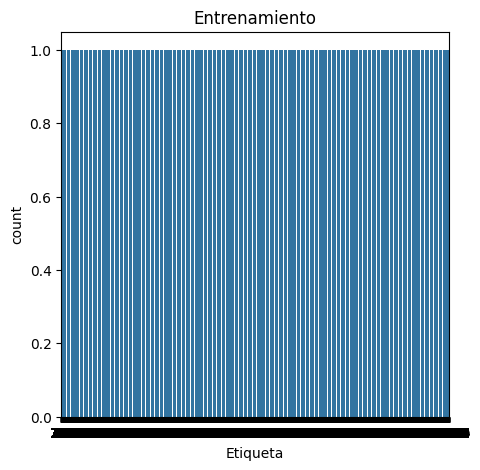

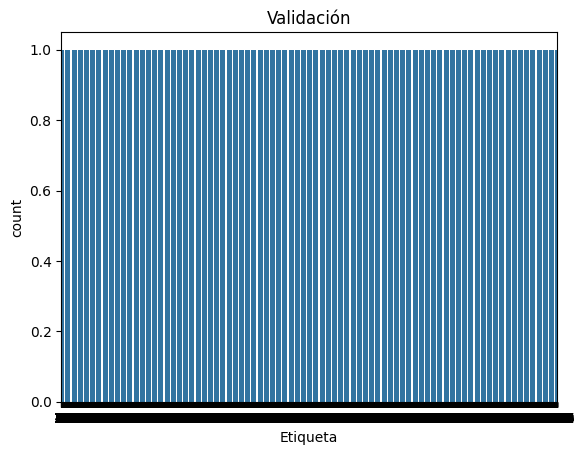

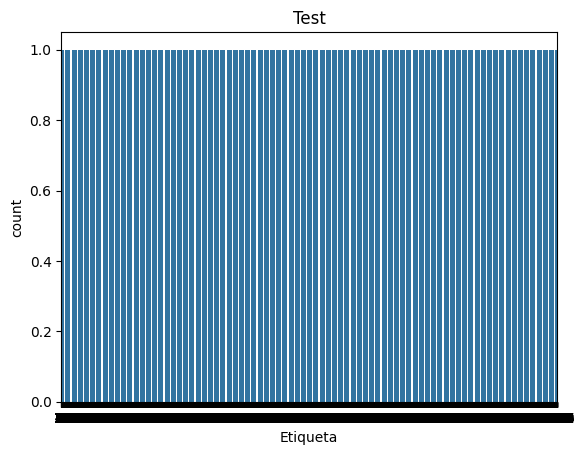

In [ ]:
# Analizamos el número de muestras por clase en cada uno de los subconjuntos de datos

plt.figure(figsize = (5,5))
sns.countplot(np.squeeze(y_train))
plt.xlabel('Etiqueta')
plt.title('Entrenamiento')
plt.show()

sns.countplot(np.squeeze(y_val))
plt.xlabel('Etiqueta')
plt.title('Validación')
plt.show()

sns.countplot(np.squeeze(y_test))
plt.xlabel('Etiqueta')
plt.title('Test')
plt.show()

In [ ]:
# Evaluamos el número registros que tenemos para cada clase
unique, counts = np.unique(y_train, return_counts=True)
print('Entrenamiento: ')
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_val, return_counts=True)
print('Validación: ')
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print('Test: ')
print(dict(zip(unique, counts)))

Entrenamiento: 
{0: 4034, 1: 3986, 2: 4019, 3: 3988, 4: 4004, 5: 3989, 6: 4026, 7: 3983, 8: 3987, 9: 3984}
Validación: 
{0: 966, 1: 1014, 2: 981, 3: 1012, 4: 996, 5: 1011, 6: 974, 7: 1017, 8: 1013, 9: 1016}
Test: 
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


Observamos balanceo entre las clases en todos los subconjuntos de datos.

In [ ]:
print('Rango valores intensidad: ', X_train.min(), '-', X_train.max())

Rango valores intensidad:  0 - 255


**PREGUNTA**

1. Transforma los datos (X_train, X_val, X_test) en el rango 0 - 1

In [ ]:
## Normalización de los datos de entrenamiento al rango [0, 1]
X_train_normalized = X_train / 255.0

## Normalización de los datos de validación al mismo rango que los datos de entrenamiento
X_val_normalized = X_val / 255.0

## Normalización de los datos de prueba al mismo rango que los datos de entrenamiento
X_test_normalized = X_test / 255.0

# Red totalmente conectada

**PREGUNTA**

2. Crea una red totalmenta conectada(sin convoluciones) con una primera capa flatten.

> Para ello, cada uno de los píxeles de la imagen será tomado como una característica de la entrada. Así, construiremos una arquitectura similar a la diseñada en las sesiones anteriores, donde tengamos una capa de entrada con 3072 nodos (32x32x3), una capa oculta con 128 nodos (activación relu) y una capa de salida con 10 nodos (uno por etiqueta).



In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

## Creación del modelo (model)
model = Sequential()

## Añado la capa Flatten para convertir la imagen en un vector unidimensional
model.add(Flatten(input_shape=(32, 32, 3)))

## Añado capa oculta con 128 nodos y funcion de activación relu
model.add(Dense(128, activation='relu'))

## Añado capa de salida con 10 nodos (uno por etiqueta) y activación softmax que es la más correcta de usar para la clasificación multiclase
model.add(Dense(10, activation='softmax'))




**PREGUNTA**

3.  Compila con loss = 'sparse_categorical_crossentropy'

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Mostrar un resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**¿Por qué "sparse_categorical_crossentropy" y no "categorical_crossentropy"?**

Ambas funciones de coste emplean la misma función basada en la entropía cruzada, la principal diferencia es la codificación de las etiquetas que acepta una y otra.

- Sparse categorical crossentropy: acepta que la etiqueta este codificada en valores numéricos enteros. Por ejemplo, para una clasificación de 3 clases, [0, 1, 2]

- Categorical crossentropy: necesita que la etiqueta este codificada en OneHot. Por ejemplo, para una clasificación de 3 clases tendremos: [1, 0, 0], [0, 1, 0], [0, 0, 1].

Por lo tanto, podemos emplear indistintamente cualquiera de las dos.

**PREGUNTA**

4. Entrena el modelo con 20 épocas y tamaño de lote = 64

In [ ]:
# Entrenamiento del modelo y añado el conjunto de normalización para evaluar el rendimiento del modelo despues de cada epoca durante el entremamiento
entrenamiento = model.fit(X_train_normalized, y_train, epochs=20, batch_size=64, validation_data=(X_val_normalized, y_val))



Epoch 1/20
625/625 [==============================] - 5s 5ms/step - loss: 1.9414 - accuracy: 0.3048 - val_loss: 1.8200 - val_accuracy: 0.3466
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 1.7790 - accuracy: 0.3716 - val_loss: 1.7548 - val_accuracy: 0.3826
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 1.7140 - accuracy: 0.3932 - val_loss: 1.6963 - val_accuracy: 0.3964
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 1.6749 - accuracy: 0.4048 - val_loss: 1.6801 - val_accuracy: 0.4087
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 1.6348 - accuracy: 0.4230 - val_loss: 1.6703 - val_accuracy: 0.4033
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 1.6153 - accuracy: 0.4276 - val_loss: 1.6335 - val_accuracy: 0.4201
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 1.5959 - accuracy: 0.4365 - val_loss: 1.6661 - val_accuracy: 0.4044
Epoch 

**PREGUNTA**

5. Plotea la exactitud del modelo e imprime el accuracy obtenido.

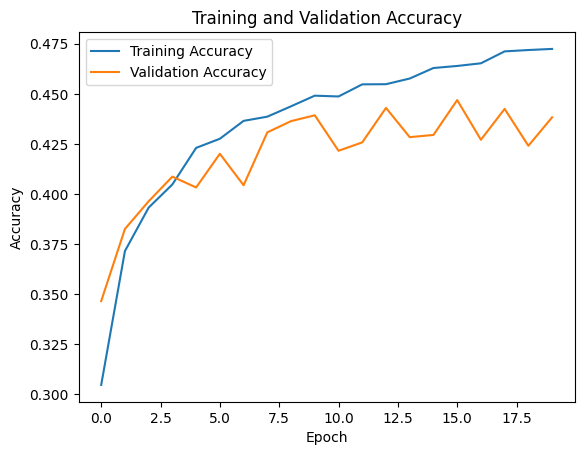

313/313 [==============================] - 1s 2ms/step - loss: 1.5497 - accuracy: 0.4502
Accuracy on test set: 0.45019999146461487


In [ ]:
import matplotlib.pyplot as plt

# Obtener la exactitud del entrenamiento
train_accuracy = entrenamiento.history['accuracy']

# Obtener la exactitud de la validación
val_accuracy = entrenamiento.history['val_accuracy']

# Plotear la exactitud del entrenamiento y de la validación
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Obtener y imprimir el accuracy obtenido
accuracy = model.evaluate(X_test_normalized, y_test)[1]
print("Accuracy on test set:", accuracy)


# Red neuronal convolucional

**PREGUNTA**

6. Crear una CNN en una función que devuelva al modelo creado create_cnn_network(). La red tendrá las siguientes capas:
* Una convolucional de 24 filtros, tamaño del kernel 3x3 y activación ReLU
* Una capa de Pooling 2x2
* Una convolucional de 36 filtros, tamaño del kernel 3x3 y activación ReLU
* Una capa de Pooling 2x2
* Una capa flatten (previa a las capas densamente conectadas)
* Una capa densa de 128 neuronas y activación ReLU
* Una capa final densa con activavión softmax


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_cnn_network():
    # Creo el modelo con el nombre modelo_cnn
    modelo_cnn = Sequential()

    # Primera capa convolucional con 24 filtros, tamaño del kernel 3x3 y activación ReLU
    modelo_cnn.add(Conv2D(24, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    # Capa de pooling 2x2
    modelo_cnn.add(MaxPooling2D((2, 2)))

    # Segunda capa convolucional con 36 filtros, tamaño del kernel 3x3 y activación ReLU
    modelo_cnn.add(Conv2D(36, (3, 3), activation='relu'))
    # Capa de pooling 2x2
    modelo_cnn.add(MaxPooling2D((2, 2)))

    # Capa flatten
    modelo_cnn.add(Flatten())
    # Capa densa de 128 neuronas y activación ReLU
    modelo_cnn.add(Dense(128, activation='relu'))
    # Capa final densa con activación softmax
    modelo_cnn.add(Dense(10, activation='softmax'))

    return modelo_cnn


**PREGUNTA**

7. Compila el modelo y entrénalo para 20 épocas y 64 de tamaño de batch. Plotea la exactitud de entrenamiento y validación y compara el accuracy obtenido con el de la red no convolucional.

In [ ]:
modelo_cnn = create_cnn_network()

In [ ]:
## Compilo el modelo
modelo_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Entreno al modelo cnn
entrenamiento_cnn = modelo_cnn.fit(X_train_normalized, y_train, epochs = 20, batch_size=64, validation_data=(X_val_normalized, y_val))


Epoch 1/20
625/625 [==============================] - 7s 6ms/step - loss: 1.5713 - accuracy: 0.4319 - val_loss: 1.3382 - val_accuracy: 0.5260
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.2385 - accuracy: 0.5608 - val_loss: 1.1655 - val_accuracy: 0.5818
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 1.0976 - accuracy: 0.6146 - val_loss: 1.0810 - val_accuracy: 0.6201
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 1.0163 - accuracy: 0.6457 - val_loss: 1.0582 - val_accuracy: 0.6307
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.9428 - accuracy: 0.6721 - val_loss: 1.0083 - val_accuracy: 0.6476
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8844 - accuracy: 0.6937 - val_loss: 0.9747 - val_accuracy: 0.6615
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8397 - accuracy: 0.7086 - val_loss: 1.0116 - val_accuracy: 0.6532
Epoch 

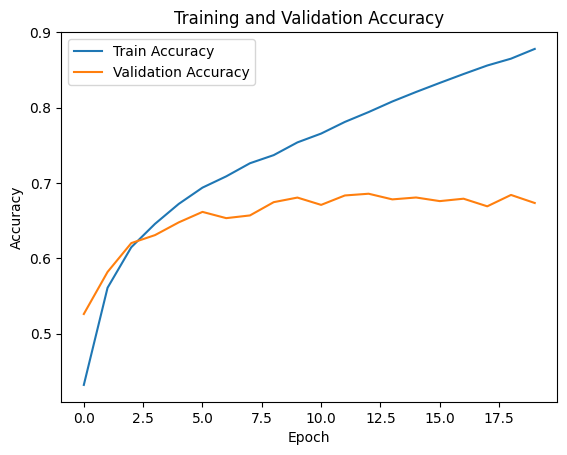

Accuracy del modelo CNN: 0.67330002784729
Accuracy del modelo no convolucional: 0.4383000135421753


In [ ]:
# Ploteo de la exactitud de entrenamiento y validación
plt.plot(entrenamiento_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(entrenamiento_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Comparación con el modelo no convolucional
score_cnn = modelo_cnn.evaluate(X_val_normalized, y_val, verbose=0)
score_no_conv = model.evaluate(X_val_normalized, y_val, verbose=0)

print("Accuracy del modelo CNN:", score_cnn[1])
print("Accuracy del modelo no convolucional:", score_no_conv[1])

Observando los resultados se puede ver como la exactitud del modelo CNN en el conjunto de datos de validación es mucho más efectiva en comparación con el modelo no convolucional por lo que se puede decir que el modelo CNN es mucho mejor y tiene mejor rendimiento para este problema en concreto.

# Tamaño de lote

Vamos a evaluar los efectos de diferentes tamaños de lote. Además. para cada prueba vamos a calcular el tiempo total de entrenamiento haciendo uso de la librería *time*.

In [ ]:
models_batch = {}
histories_batch = {}
times_batch = {}

batches = [10, 20, 50, 100, 200, 500, 1000]

for batch in batches:

  print(f'Entrenando con tamaño de batch: {batch}')

  ini = time.time()

  models_batch['bs_' + str(batch)] = create_cnn_network()

  models_batch['bs_' + str(batch)].compile(optimizer='adam',
                                 loss='sparse_categorical_crossentropy',
                                 metrics=['accuracy'])

  histories_batch['bs_' + str(batch)] = models_batch['bs_' + str(batch)].fit(
      X_train, y_train,
      batch_size=batch,
      epochs=8,
      validation_data=(X_val, y_val),
      verbose=0)

  times_batch['bs_' + str(batch)] = time.time() - ini

  # Garbage collector. Por lo general no hace falta, pero, dado que contamos
  # con poca RAM vamos a limpiarla tras cada entrenamiento para evitar que el
  # kernel se pare por falta de memoria
  gc.collect()

Entrenando con tamaño de batch: 10
Entrenando con tamaño de batch: 20
Entrenando con tamaño de batch: 50
Entrenando con tamaño de batch: 100
Entrenando con tamaño de batch: 200
Entrenando con tamaño de batch: 500
Entrenando con tamaño de batch: 1000


(0.0, 1.0)

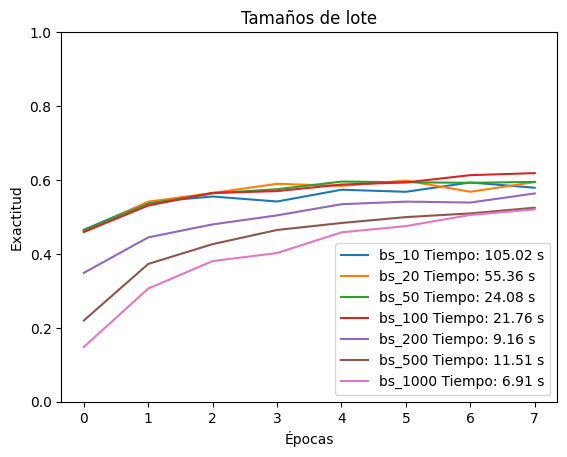

In [ ]:
# Representamos curvas validación y tiempo de ejecución de cada modelo
for bs in histories_batch.keys():

  plt.plot(histories_batch[bs].history['val_accuracy'], label=bs + ' Tiempo: ' + str(np.round(times_batch[bs], 2)) + ' s')

plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.title('Tamaños de lote')
plt.legend()
plt.ylim([0, 1])

**NOTA**: Los números que aparecen aquí pueden variar ligeramente entre ejecuciones

Podemos ver como con tamaños de lote hasta 100/200 se obtienen resultados similares en validación, sin embargo, el tiempo de ejecución es significativamente menor cuanto mayor es el tamaño de lote (105s para tamaño de lote de 10 vs. 21s para tamaño de lote de 100). Sin embargo, con tamaños de lote más elevados, la precisión disminuye.

Viendo las gráficas anteriores. ¿Realmente creemos que con tamaños de lote elevados hemos llegado a la convergencia?

*Aunque el tiempo de entrenamiento disminuye bastante desde los lotes vas pequeños a los más grandes, la precisión del modelo en el conjunto de validación tiende a bajar, por lo tanto, el modelo podría mejorar ajustando las epocas o ajustando el tamaño del lote. La convergencia indica que el modelo ha alcanzado su rendimiento optimo  en su precisión y que no mejora inlcuso despues de entrenar durante más epocas. En resumen, se puede decir que el modelo tiene margen de mejora, por lo que no ha alcanzado completamente la convergencia en el tamaño de lotes indicados.*

# Early stopping

**PREGUNTA**

8. Modifica el código siguiente para añadir un early stopping (paciencia 5) que monitorice la función de pérdida del dataset de validación y que restaure los mejores valores. (100 épocas máximo)

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
models_batch_stop = {}
histories_batch_stop = {}
times_batch_stop = {}

batches = [10, 20, 50, 100, 200, 500, 1000]

for batch in batches:

  print(f'Entrenando con tamaño de batch: {batch}')

  ini = time.time()

  #### AÑADE TU CÓDIGO AQUÍ ####
  early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)


  models_batch_stop['bs_' + str(batch)] = create_cnn_network()

  models_batch_stop['bs_' + str(batch)].compile(optimizer='adam',
                                                loss='sparse_categorical_crossentropy',
                                                metrics=['accuracy'])

  histories_batch_stop['bs_' + str(batch)] = models_batch_stop['bs_' + str(batch)].fit(
      X_train, y_train,
      batch_size=batch,
      epochs=100,
      callbacks = [early_stopping],
      #### AÑADE TU CÓDIGO AQUÍ ####

      validation_data=(X_val, y_val),
      verbose=0)

  times_batch_stop['bs_' + str(batch)] = time.time() - ini

  gc.collect()

Entrenando con tamaño de batch: 10
Entrenando con tamaño de batch: 20
Entrenando con tamaño de batch: 50
Entrenando con tamaño de batch: 100
Entrenando con tamaño de batch: 200
Entrenando con tamaño de batch: 500
Entrenando con tamaño de batch: 1000


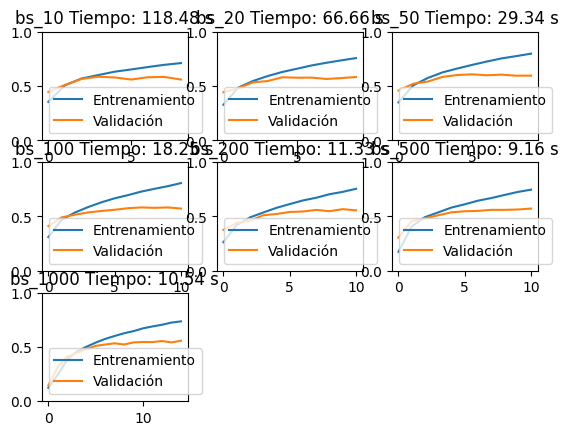

In [ ]:
# Representamos curvas de entrenamiento y validación para cada tamaño de lote y
# el tiempo de entrenamiento
for i, bs in enumerate(histories_batch_stop.keys()):
  plt.subplot(3, 3, i+1)
  plt.plot(histories_batch_stop[bs].history['accuracy'], label='Entrenamiento')
  plt.plot(histories_batch_stop[bs].history['val_accuracy'], label='Validación')
  # Incluimos tiempo de entrenamiento en el titulo
  plt.title(f'{bs} Tiempo: {np.round(times_batch_stop[bs], 2)} s')
  plt.legend()
  plt.ylim([0,1])

Ahora ya vemos que para tamaños de lote más altos, el modelo ha llegado a converger.
Vamos a ver que sucede en el conjunto de datos de test.

In [ ]:
for bs in models_batch_stop.keys():

  _, acc = models_batch_stop[bs].evaluate(X_test, y_test, verbose=0)
  n_epochs = len(histories_batch_stop[bs].history['accuracy'])
  ex_time = times_batch_stop[bs]
  print(f'Exactitud test {bs}: {acc}; N épocas: {n_epochs}; Tiempo: {ex_time} s')

Exactitud test bs_10: 0.5845000147819519; N épocas: 9; Tiempo: 118.48126316070557 s
Exactitud test bs_20: 0.5848000049591064; N épocas: 10; Tiempo: 66.6581871509552 s
Exactitud test bs_50: 0.5960999727249146; N épocas: 10; Tiempo: 29.337600708007812 s
Exactitud test bs_100: 0.5648999810218811; N épocas: 11; Tiempo: 18.252172231674194 s
Exactitud test bs_200: 0.5311999917030334; N épocas: 11; Tiempo: 11.325955629348755 s
Exactitud test bs_500: 0.5443999767303467; N épocas: 11; Tiempo: 9.160198450088501 s
Exactitud test bs_1000: 0.5389999747276306; N épocas: 15; Tiempo: 10.53888463973999 s


Podemos ver como ahora han cambiado considerablemente los resultados. Resultados similares se obtienen con diferentes tamaños de lote, sin embargo, el tiempo de entrenamiento cambia.

Podemos ver que la combinación que mejores resultados ofrece es emplear un tamaño de lote de 100 y entrenar a lo largo de 17 épocas. Lo que supone un tiempo de entrenamiento de 42 segundos. Sin embargo, los resultados que se obtienen con un tamaño de lote de 20 son similares, sin embargo el tiempo de ejecución aumenta.

En este caso no nos encontramos este escenario, pero en otras ocasiones en la que tengamos conjuntos de datos más grandes o imágenes de mayor resolución, puede darse el caso que merezca la pena prescindir de un poco de precisión a favor de un menor tiempo de entrenamiento.

Para siguientes experimentos vamos a mantener tamaño de lote 100 y EarlyStopping.

# Añadimos filtros a las capas convolucionales

**PREGUNTA**

9. Vamos a incrementar la complejidad de la arquitectura para comprobar si mejoramos los resultados. Crea la función create_cnn_network_filters() que devuelva el modelo con las siguientes capas:

* Una convolucional de **128** filtros, tamaño del kernel 3x3 y activación ReLU
* Una capa de Pooling 2x2
* Una convolucional de **256** filtros, tamaño del kernel 3x3 y activación ReLU
* Una capa de Pooling 2x2
* Una capa flatten (previa a las capas densamente conectadas)
* Una capa densa de 128 neuronas y activación ReLU
* Una capa final densa con activavión softmax

Mantén el early stopping visto anteriormente. tamaño de batch = 100, y 50 épocas máximo y entrénalo.

Plotea el accuracy de entrenamiento y validación.

Compara el accuracy conseguido con respecto a modelo original.

In [ ]:
def create_cnn_network_filters():
    # Crear el modelo
    modelo_cnn_filters = Sequential()

    # Primera capa convolucional con 128 filtros, tamaño del kernel 3x3 y activación ReLU
    modelo_cnn_filters.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    # Capa de pooling 2x2
    modelo_cnn_filters.add(MaxPooling2D((2, 2)))

    # Segunda capa convolucional con 256 filtros, tamaño del kernel 3x3 y activación ReLU
    modelo_cnn_filters.add(Conv2D(256, (3, 3), activation='relu'))
    # Capa de pooling 2x2
    modelo_cnn_filters.add(MaxPooling2D((2, 2)))

    # Capa flatten
    modelo_cnn_filters.add(Flatten())
    # Capa densa de 128 neuronas y activación ReLU
    modelo_cnn_filters.add(Dense(128, activation='relu'))
    # Capa final densa con activación softmax
    modelo_cnn_filters.add(Dense(10, activation='softmax'))

    return modelo_cnn_filters


In [ ]:
modelo_cnn_filters = create_cnn_network_filters()

modelo_cnn_filters.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
entrenamiento_filters = modelo_cnn_filters.fit(X_train_normalized, y_train,
                                         batch_size=100,
                                         epochs=50,
                                         callbacks=[early_stopping],
                                         validation_data=(X_val_normalized, y_val),
                                         verbose=1)


Epoch 1/50
400/400 [==============================] - 7s 13ms/step - loss: 1.4986 - accuracy: 0.4589 - val_loss: 1.2813 - val_accuracy: 0.5452
Epoch 2/50
400/400 [==============================] - 5s 13ms/step - loss: 1.1067 - accuracy: 0.6145 - val_loss: 1.0531 - val_accuracy: 0.6293
Epoch 3/50
400/400 [==============================] - 5s 13ms/step - loss: 0.9367 - accuracy: 0.6747 - val_loss: 0.9906 - val_accuracy: 0.6575
Epoch 4/50
400/400 [==============================] - 5s 13ms/step - loss: 0.8354 - accuracy: 0.7115 - val_loss: 0.9076 - val_accuracy: 0.6874
Epoch 5/50
400/400 [==============================] - 5s 12ms/step - loss: 0.7509 - accuracy: 0.7426 - val_loss: 0.8697 - val_accuracy: 0.7030
Epoch 6/50
400/400 [==============================] - 5s 12ms/step - loss: 0.6594 - accuracy: 0.7736 - val_loss: 0.8745 - val_accuracy: 0.7053
Epoch 7/50
400/400 [==============================] - 5s 13ms/step - loss: 0.5898 - accuracy: 0.7967 - val_loss: 0.8675 - val_accuracy: 0.7140

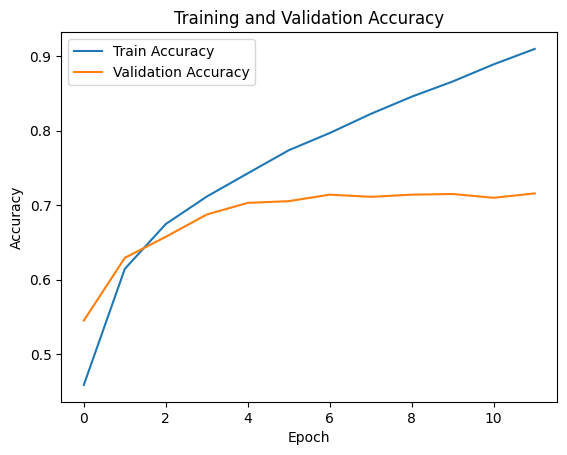

In [ ]:
import matplotlib.pyplot as plt

plt.plot(entrenamiento_filters.history['accuracy'], label='Train Accuracy')
plt.plot(entrenamiento_filters.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
score_filters = modelo_cnn_filters.evaluate(X_val_normalized, y_val, verbose=0)
score_original = modelo_cnn.evaluate(X_val_normalized, y_val, verbose=0)

print("Accuracy del modelo con filtros:", score_filters[1])
print("Accuracy del modelo original:", score_original[1])


Accuracy del modelo con filtros: 0.7139999866485596
Accuracy del modelo original: 0.67330002784729


# Añadimos más capas convolucionales

A continuación, vamos a evaluar los efectos de incorporar más capas convolucionales al modelo (ampliamos la complejidad del modelo).

**PREGUNTA**

10. Crea el método create_cnn_network_layers() que devuelva el modelo con las siguientes capas:

* Una convolucional de **128** filtros, tamaño del kernel 3x3 y activación ReLU
* Una convolucional de **128** filtros, tamaño del kernel 3x3 y activación ReLU
* Una capa de Pooling 2x2
* Una convolucional de **256** filtros, tamaño del kernel 3x3 y activación ReLU
* Una convolucional de **256** filtros, tamaño del kernel 3x3 y activación ReLU
* Una capa de Pooling 2x2
* Una convolucional de **512** filtros, tamaño del kernel 3x3 y activación ReLU
* Una convolucional de **512** filtros, tamaño del kernel 3x3 y activación ReLU
* Una capa flatten (previa a las capas densamente conectadas)
* Una capa densa de 128 neuronas y activación ReLU
* Una capa final densa con activavión softmax

Añádele el early stopping visto anteriormente. tamaño de batch = 100, y 50 épocas máximo y entrénalo.

Plotea el accuracy de entrenamiento y validación.

Compara el accuracy conseguido con respecto a los modelos anteriores.

In [ ]:
def create_cnn_network_layers():
    modelo_cnn_layers = Sequential()

    modelo_cnn_layers.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    modelo_cnn_layers.add(Conv2D(128, (3, 3), activation='relu'))
    modelo_cnn_layers.add(MaxPooling2D((2, 2), padding='same'))

    modelo_cnn_layers.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    modelo_cnn_layers.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    modelo_cnn_layers.add(MaxPooling2D((2, 2), padding='same'))

    modelo_cnn_layers.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    modelo_cnn_layers.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    modelo_cnn_layers.add(MaxPooling2D((2, 2), padding='same'))

    modelo_cnn_layers.add(Flatten())
    modelo_cnn_layers.add(Dense(128, activation='relu'))
    modelo_cnn_layers.add(Dense(10, activation='softmax'))

    return modelo_cnn_layers



In [ ]:
modelo_cnn_layers = create_cnn_network_layers()

modelo_cnn_layers.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history_layers = modelo_cnn_layers.fit(X_train_normalized, y_train,
                                       batch_size=100,
                                       epochs=50,
                                       callbacks=[early_stopping],
                                       validation_data=(X_val_normalized, y_val),
                                       verbose=1)


Epoch 1/50
400/400 [==============================] - 26s 51ms/step - loss: 1.7537 - accuracy: 0.3504 - val_loss: 1.4055 - val_accuracy: 0.4957
Epoch 2/50
400/400 [==============================] - 20s 51ms/step - loss: 1.1861 - accuracy: 0.5731 - val_loss: 0.9807 - val_accuracy: 0.6595
Epoch 3/50
400/400 [==============================] - 20s 51ms/step - loss: 0.8876 - accuracy: 0.6868 - val_loss: 0.9012 - val_accuracy: 0.6805
Epoch 4/50
400/400 [==============================] - 20s 50ms/step - loss: 0.7072 - accuracy: 0.7535 - val_loss: 0.7829 - val_accuracy: 0.7335
Epoch 5/50
400/400 [==============================] - 20s 50ms/step - loss: 0.5608 - accuracy: 0.8049 - val_loss: 0.7329 - val_accuracy: 0.7432
Epoch 6/50
400/400 [==============================] - 20s 50ms/step - loss: 0.4511 - accuracy: 0.8418 - val_loss: 0.6841 - val_accuracy: 0.7737
Epoch 7/50
400/400 [==============================] - 21s 53ms/step - loss: 0.3326 - accuracy: 0.8809 - val_loss: 0.7538 - val_accuracy:

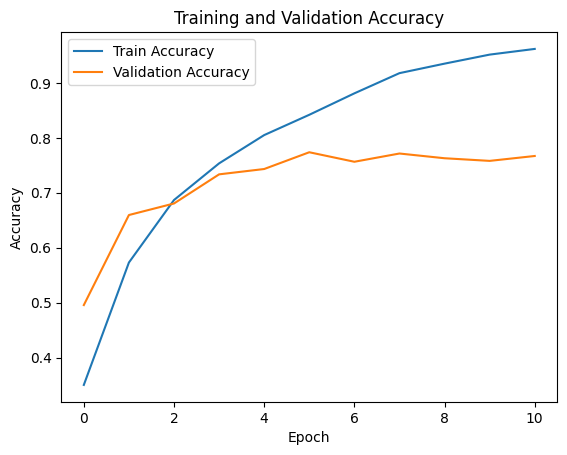

In [ ]:
plt.plot(history_layers.history['accuracy'], label='Train Accuracy')
plt.plot(history_layers.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
score_layers = modelo_cnn_layers.evaluate(X_val_normalized, y_val, verbose=0)
score_filters = modelo_cnn_filters.evaluate(X_val_normalized, y_val, verbose=0)
score_original = modelo_cnn.evaluate(X_val_normalized, y_val, verbose=0)

print("Accuracy del modelo con capas:", score_layers[1])
print("Accuracy del modelo con filtros:", score_filters[1])
print("Accuracy del modelo original:", score_original[1])


Accuracy del modelo con capas: 0.7736999988555908
Accuracy del modelo con filtros: 0.7139999866485596
Accuracy del modelo original: 0.67330002784729


# Regularización

**PREGUNTA**

11. Crea el método create_cnn_network_droput_bn() que delvuelve un modelo que será igual al anterior, pero añade una capa de Batch Normalization después de cada capa convolucional 2D y una de Droput del 25% entre las dos capas densas y compara los resultados.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def create_cnn_network_dropout_bn():
    modelo_cnn_dropout_bn = Sequential()

    modelo_cnn_dropout_bn.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    modelo_cnn_dropout_bn.add(BatchNormalization())
    modelo_cnn_dropout_bn.add(Conv2D(128, (3, 3), activation='relu'))
    modelo_cnn_dropout_bn.add(BatchNormalization())
    modelo_cnn_dropout_bn.add(MaxPooling2D((2, 2), padding='same'))

    modelo_cnn_dropout_bn.add(Conv2D(256, (3, 3), activation='relu'))
    modelo_cnn_dropout_bn.add(BatchNormalization())
    modelo_cnn_dropout_bn.add(Conv2D(256, (3, 3), activation='relu'))
    modelo_cnn_dropout_bn.add(BatchNormalization())
    modelo_cnn_dropout_bn.add(MaxPooling2D((2, 2), padding='same'))

    modelo_cnn_dropout_bn.add(Conv2D(512, (3, 3), activation='relu'))
    modelo_cnn_dropout_bn.add(BatchNormalization())
    modelo_cnn_dropout_bn.add(Conv2D(512, (3, 3), activation='relu'))
    modelo_cnn_dropout_bn.add(BatchNormalization())
    modelo_cnn_dropout_bn.add(MaxPooling2D((2, 2), padding='same'))

    modelo_cnn_dropout_bn.add(Flatten())
    modelo_cnn_dropout_bn.add(Dense(128, activation='relu'))
    modelo_cnn_dropout_bn.add(Dropout(0.25))  # Capa de Dropout del 25%
    modelo_cnn_dropout_bn.add(Dense(10, activation='softmax'))

    return modelo_cnn_dropout_bn


In [ ]:
modelo_cnn_dropout_bn = create_cnn_network_dropout_bn()

modelo_cnn_dropout_bn.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history_dropout_bn = modelo_cnn_layers.fit(X_train_normalized, y_train,
                                       batch_size=100,
                                       epochs=50,
                                       callbacks=[early_stopping],
                                       validation_data=(X_val_normalized, y_val),
                                       verbose=1)

Epoch 1/50
400/400 [==============================] - 22s 55ms/step - loss: 0.3071 - accuracy: 0.8918 - val_loss: 0.7275 - val_accuracy: 0.7695
Epoch 2/50
400/400 [==============================] - 20s 51ms/step - loss: 0.2266 - accuracy: 0.9204 - val_loss: 0.8227 - val_accuracy: 0.7684
Epoch 3/50
400/400 [==============================] - 21s 53ms/step - loss: 0.1796 - accuracy: 0.9362 - val_loss: 0.8608 - val_accuracy: 0.7674
Epoch 4/50
400/400 [==============================] - 21s 52ms/step - loss: 0.1344 - accuracy: 0.9525 - val_loss: 0.9320 - val_accuracy: 0.7672
Epoch 5/50
400/400 [==============================] - 21s 52ms/step - loss: 0.1187 - accuracy: 0.9580 - val_loss: 1.0897 - val_accuracy: 0.7621
Epoch 6/50
400/400 [==============================] - 20s 50ms/step - loss: 0.1100 - accuracy: 0.9614 - val_loss: 1.2485 - val_accuracy: 0.7517


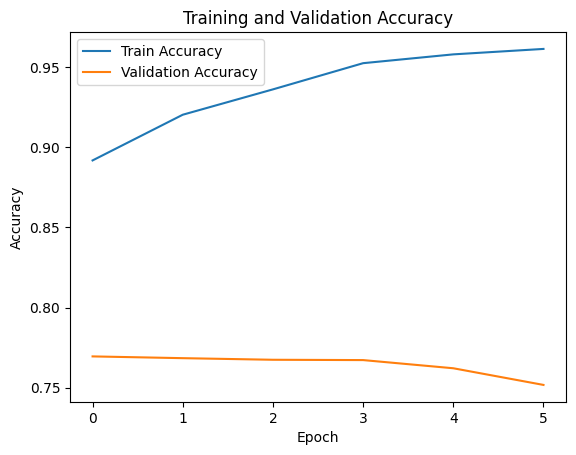

In [ ]:
plt.plot(history_dropout_bn.history['accuracy'], label='Train Accuracy')
plt.plot(history_dropout_bn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
score_layers = modelo_cnn_layers.evaluate(X_val_normalized, y_val, verbose=0)
print("Accuracy del modelo con capas:", score_layers[1])
score_dropout_bn = modelo_cnn_dropout_bn.evaluate(X_val_normalized, y_val, verbose=0)
print("Accuracy del modelo con capas Batch Normalization:", score_dropout_bn[1])

Accuracy del modelo con capas: 0.7695000171661377
Accuracy del modelo con capas Batch Normalization: 0.10109999775886536


# Análisis de las predicciones

Vamos a inspeccionar algunas predicciones:

In [ ]:
# Hacemos predicciones de las imágenes de test
y_pred_test = modelo_cnn_dropout_bn.predict(X_test) # Predicción de la probabilidad de que la imagen pertenezca a cada clase
y_pred_test_classes = np.argmax(y_pred_test, axis=1) # Clase con la probabilidad mayor
y_test_classes = y_test # clase real

313/313 [==============================] - 2s 4ms/step


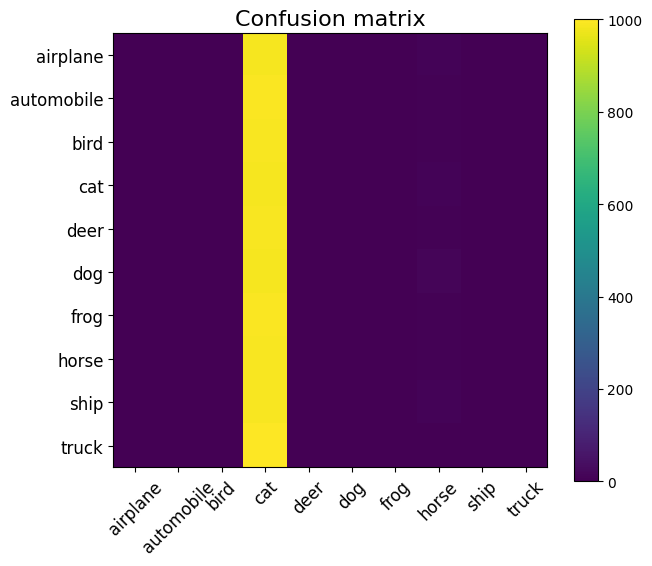

Test accuracy: 0.0995


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_classes, y_pred_test_classes))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_classes, y_pred_test_classes))

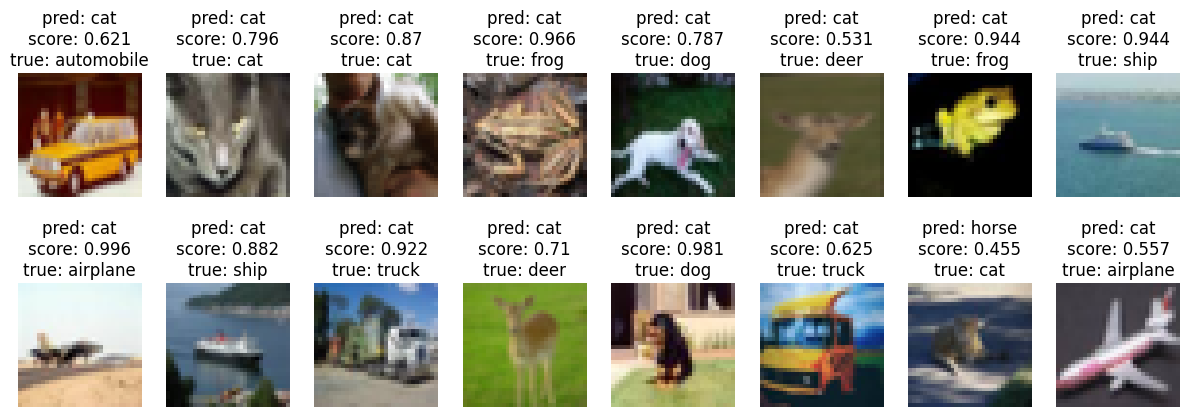

In [ ]:
# inspeccionamos las predicciones
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label = classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test[random_index].max()
        true_label = classes[y_test[random_index][0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

313/313 [==============================] - 2s 5ms/step


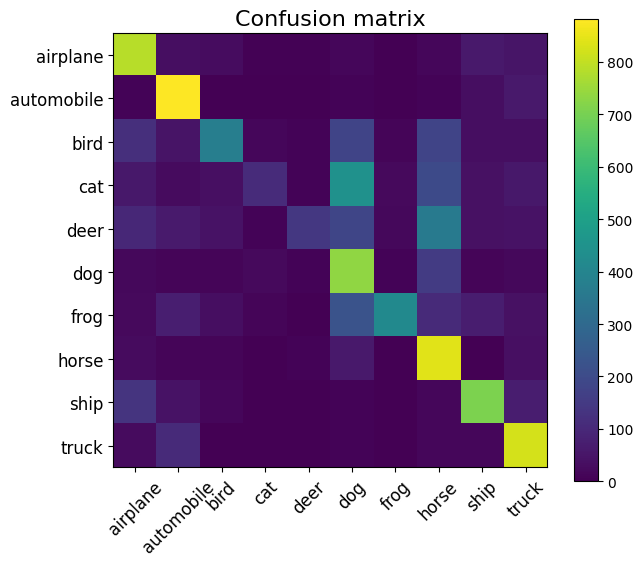

Test accuracy: 0.5821


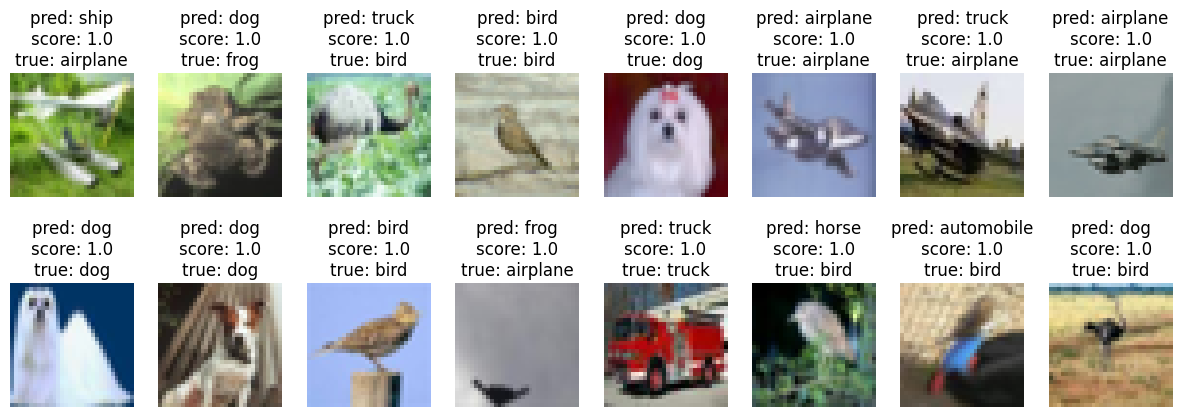

In [ ]:
## Otras predicciones con el modelo modelo_cnn_layers:
# Hacemos predicciones de las imágenes de test
y_pred_test = modelo_cnn_layers.predict(X_test) # Predicción de la probabilidad de que la imagen pertenezca a cada clase
y_pred_test_classes = np.argmax(y_pred_test, axis=1) # Clase con la probabilidad mayor
y_test_classes = y_test # clase real


plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_classes, y_pred_test_classes))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_classes, y_pred_test_classes))


# inspeccionamos las predicciones
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label = classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test[random_index].max()
        true_label = classes[y_test[random_index][0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

313/313 [==============================] - 1s 3ms/step


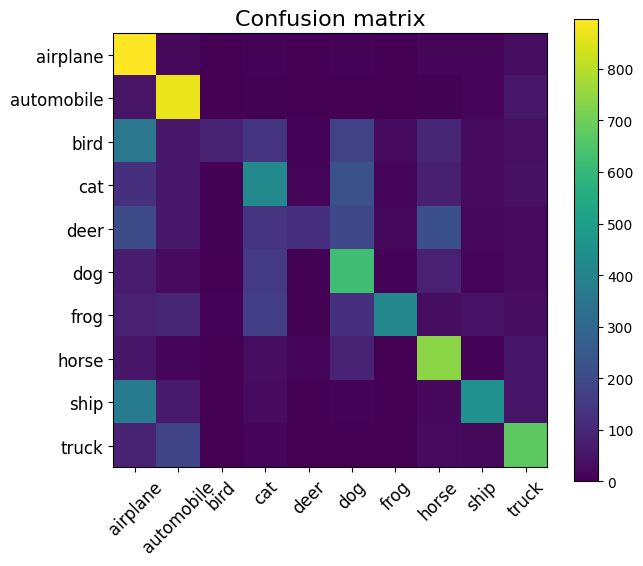

Test accuracy: 0.5302


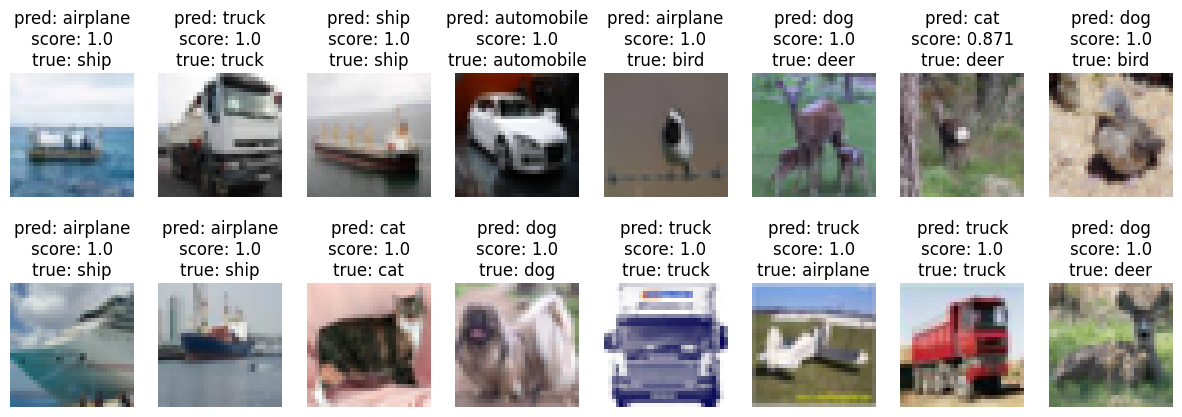

In [ ]:
## Otras predicciones con el modelo modelo_cnn_filters:
# Hacemos predicciones de las imágenes de test
y_pred_test = modelo_cnn_filters.predict(X_test) # Predicción de la probabilidad de que la imagen pertenezca a cada clase
y_pred_test_classes = np.argmax(y_pred_test, axis=1) # Clase con la probabilidad mayor
y_test_classes = y_test # clase real


plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_classes, y_pred_test_classes))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_classes, y_pred_test_classes))


# inspeccionamos las predicciones
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label = classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test[random_index].max()
        true_label = classes[y_test[random_index][0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

313/313 [==============================] - 1s 2ms/step


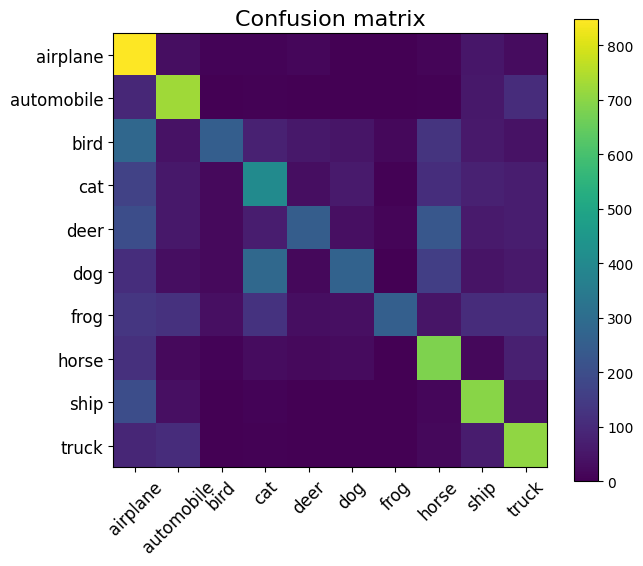

Test accuracy: 0.5098


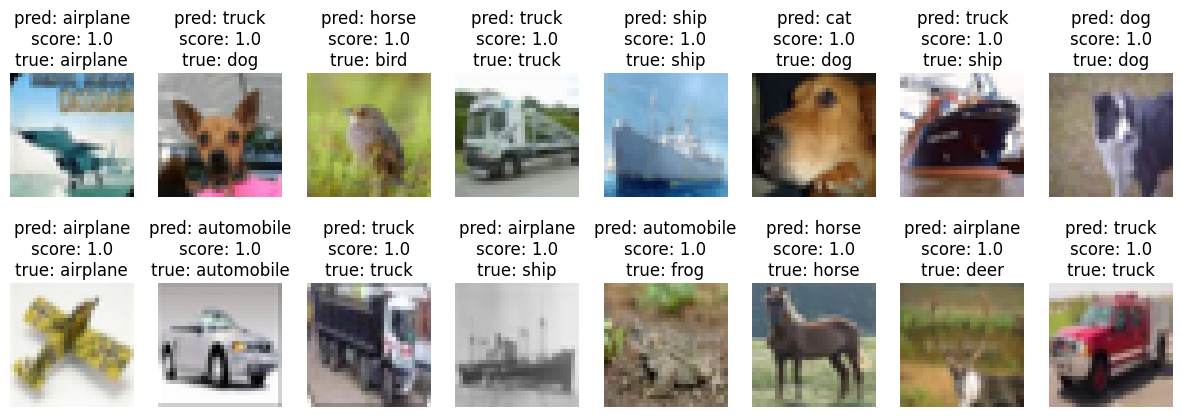

In [ ]:
## Otras predicciones con el modelo modelo_cnn (original):
# Hacemos predicciones de las imágenes de test
y_pred_test = modelo_cnn.predict(X_test) # Predicción de la probabilidad de que la imagen pertenezca a cada clase
y_pred_test_classes = np.argmax(y_pred_test, axis=1) # Clase con la probabilidad mayor
y_test_classes = y_test # clase real


plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_classes, y_pred_test_classes))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_classes, y_pred_test_classes))


# inspeccionamos las predicciones
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label = classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test[random_index].max()
        true_label = classes[y_test[random_index][0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()



**PREGUNTA**

12. Descarga una imagen de internet y utiliza el modelo para ver si averigua la cartegoría correctamente

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
           'horse', "ship", "truck"]

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
print("Accuracy del modelo con capas:", score_layers[1])
print("Accuracy del modelo con filtros:", score_filters[1])
print("Accuracy del modelo original:", score_original[1])
print("Accuracy del modelo con capas Batch Normalization:", score_dropout_bn[1])

Accuracy del modelo con capas: 0.7695000171661377
Accuracy del modelo con filtros: 0.7139999866485596
Accuracy del modelo original: 0.67330002784729
Accuracy del modelo con capas Batch Normalization: 0.10109999775886536


A continuación vamos a realzar lo mismo con el modelo que tiene el mayor accuracy. En este caso realizaremos las mismas pruebas con el modelo con filtros:

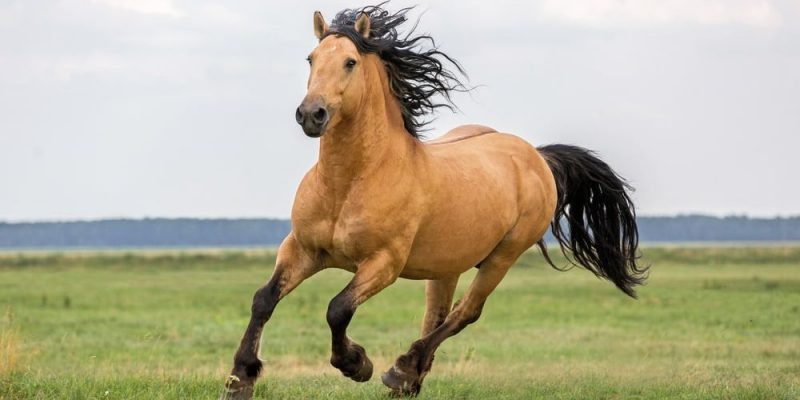

In [ ]:
 image1 = Image.open("horse.jpg")
image1


In [ ]:
# Redimensiono la imagen y convierto a un array normalizando los valores a [0, 1]
image1 = image1.resize((32, 32))
image_array1 = np.array(image1)
image_array1 = image_array1 / 255.0

# Añado una dimensión adicional para la muestra
image_array1 = np.expand_dims(image_array1, axis=0)
# Predicción utilizando el modelo
predicted_probabilities1 = modelo_cnn_filters.predict(image_array1)
# La clase con la probabilidad más alta
predicted_class1 = np.argmax(predicted_probabilities1)
# Etiqueta de la clase que se ha predecido
predicted_label1 = classes[predicted_class1]
print("La imagen 1 parece pertenecer a la categoría:", predicted_label1)

1/1 [==============================] - 0s 231ms/step
La imagen 1 parece pertenecer a la categoría: horse


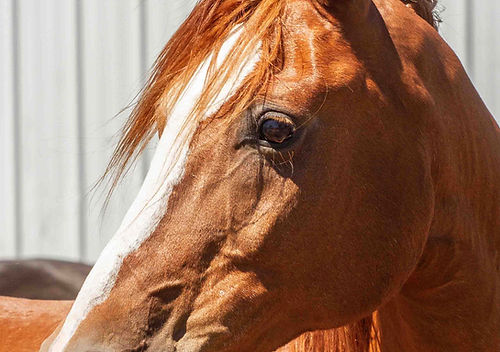

In [ ]:
image2 = Image.open("horse1.jpg")
image2

In [ ]:
image2 = Image.open("horse1.jpg")
image2 = image2.resize((32, 32))
image_array2 = np.array(image2)
image_array2 = image_array2 / 255.0

# Añado una dimensión adicional para la muestra
image_array2 = np.expand_dims(image_array2, axis=0)
# Predicción utilizando el modelo
predicted_probabilities2 = modelo_cnn_filters.predict(image_array2)
# La clase con la probabilidad más alta
predicted_class2 = np.argmax(predicted_probabilities2)
# Etiqueta de la clase que se ha predecido
predicted_label2 = classes[predicted_class2]
print("La imagen 2 parece pertenecer a la categoría:", predicted_label2)

1/1 [==============================] - 0s 18ms/step
La imagen 2 parece pertenecer a la categoría: cat


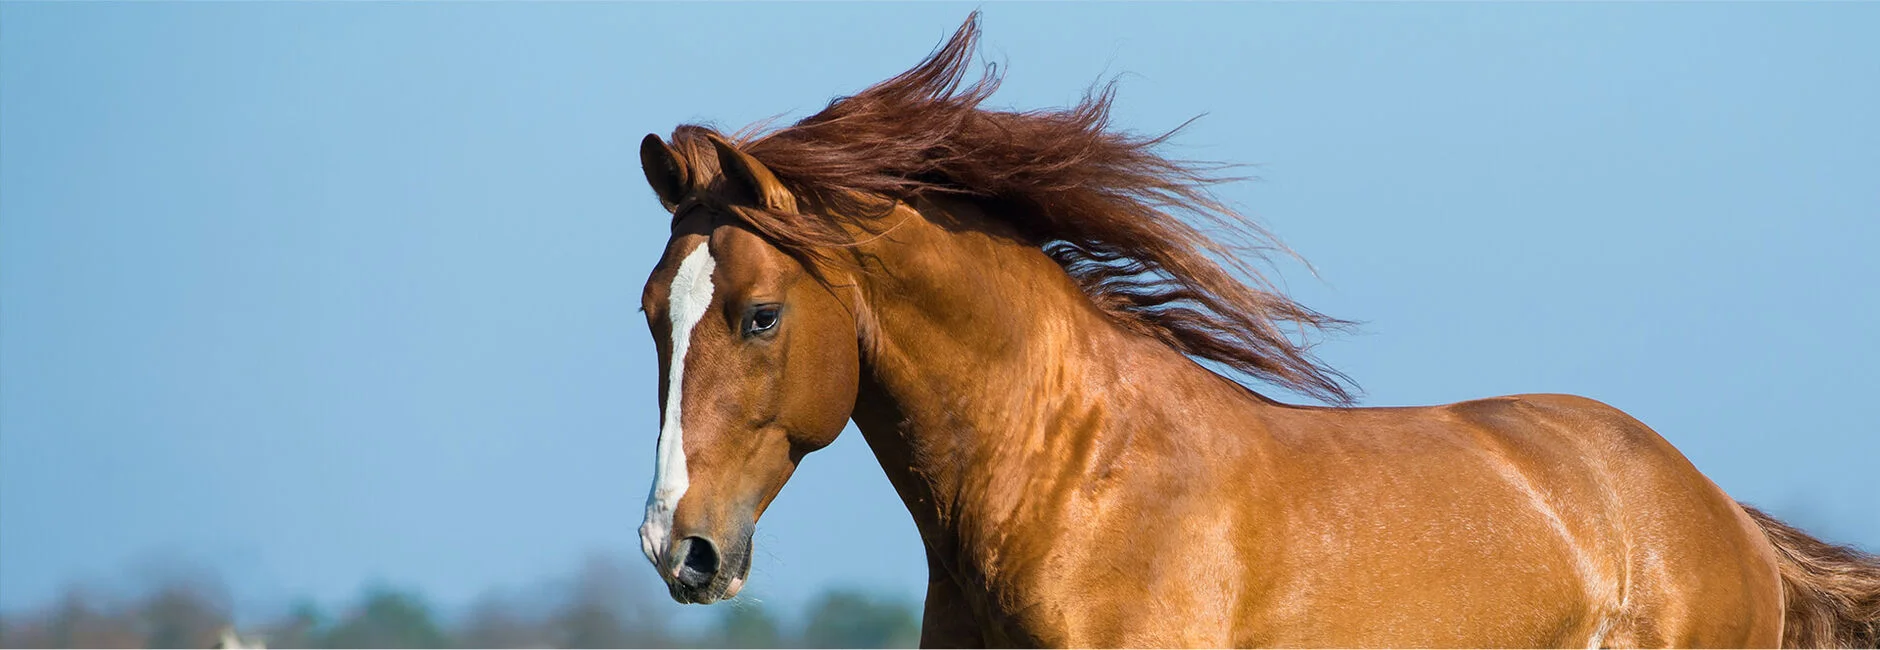

In [ ]:
image3 = Image.open("horse2.jpg")
image3

In [ ]:
image3 = image3.resize((32, 32))
image_array3 = np.array(image3)
image_array3 = image_array3 / 255.0

# Añado una dimensión adicional para la muestra
image_array3 = np.expand_dims(image_array3, axis=0)
# Predicción utilizando el modelo
predicted_probabilities3 = modelo_cnn_filters.predict(image_array3)
# La clase con la probabilidad más alta
predicted_class3 = np.argmax(predicted_probabilities3)
# Etiqueta de la clase que se ha predecido
predicted_label3 = classes[predicted_class3]
print("La imagen 3 parece pertenecer a la categoría:", predicted_label3)

1/1 [==============================] - 0s 17ms/step
La imagen 3 parece pertenecer a la categoría: bird


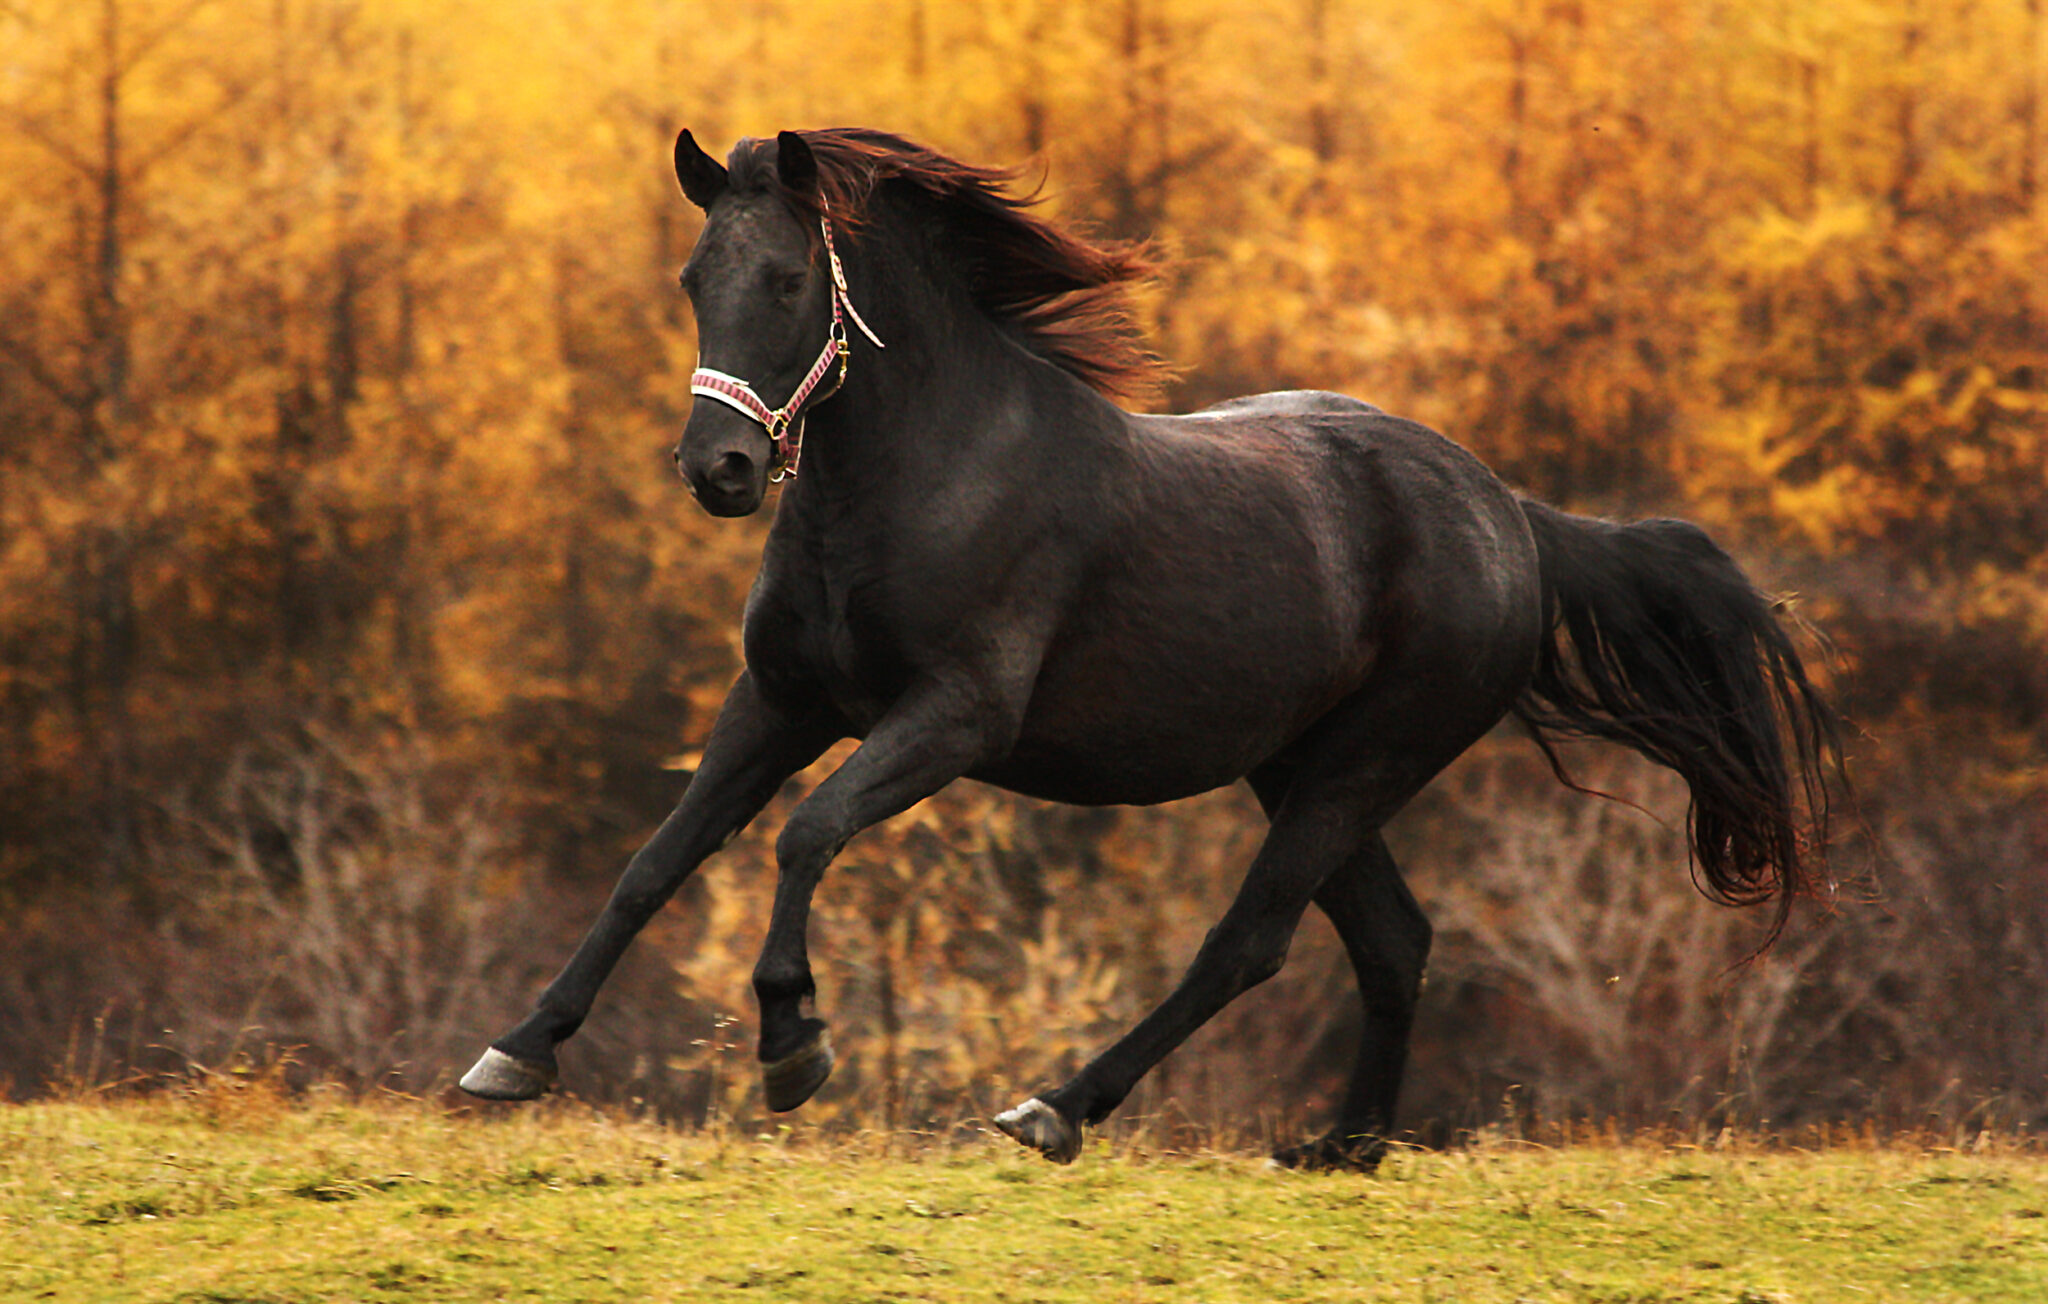

In [ ]:
image4 = Image.open("horse3.jpg")
image4

In [ ]:
image4 = image4.resize((32, 32))
image_array4 = np.array(image4)
image_array4 = image_array4 / 255.0

# Añado una dimensión adicional para la muestra
image_array4 = np.expand_dims(image_array4, axis=0)
# Predicción utilizando el modelo
predicted_probabilities4 = modelo_cnn_filters.predict(image_array4)
# La clase con la probabilidad más alta
predicted_class4 = np.argmax(predicted_probabilities4)
# Etiqueta de la clase que se ha predecido
predicted_label4 = classes[predicted_class4]
print("La imagen 3 parece pertenecer a la categoría:", predicted_label4)

1/1 [==============================] - 0s 17ms/step
La imagen 3 parece pertenecer a la categoría: horse


Por lo tanto, en el modelo con filtros hemos comprobado que dependiendo de la imagen es capaz de identificar correctamente o no la clase a la que pertenece. He realizado la prueba con imagenes diferentes de caballos. De ahí que tenga un accuracy de 67% ya que es capaz de identificar correctamente bastantes imagenes (un poco más de la mitad) pero a su vez comete bastantes errores.